In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

color = ['#E64980', '#FFA94D', '#74B816', '#748FFC']

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    diff = p - q
    e_dist = np.sqrt(np.power(diff, 2).sum())
    return e_dist


In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    
    e_dist = _dist(p,q)
    if e_dist <= eps :
        return True 
    if e_dist > eps :
        return False
    else :
        print('error')
        

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    
    neighbor = []
    for i in range(n_points) : # check whether they are neighbor or not
        temp = _eps_neighborhood(m[:,i], m[:, point_id], eps)
        neighbor.append(temp)
        
    # neighbor[point_id] = False  # correct the point itself as not-neighbor-point #自己也算啦

    nb_index = np.where(np.array(neighbor) == True)
    seeds = nb_index[0]
    
    return seeds

##### 自己先寫一遍的 (先釐清程式功能)  ###

In [278]:
###  自己先寫一遍的 (先釐清程式功能)  ###

eps = 1.6
n_points = t.shape[1]

nb = pd.Series([_region_query(t, 0, eps)], index=[0])  # nb = 每個點的鄰居，pd.Series
for i in range(n_points) :
      nb[i] = _region_query(t, i, eps)


classi = np.full(n_points, np.nan)  # classification
df = pd.DataFrame({'neighbor point' : nb, 'classification' : classi})  # df  = 儲存每個點的dataframe



# get all points in one same cluster
def find_relative_point(nb_df, nb_list) :
    neighbor = np.array([], dtype=int)
    
    for i in nb_list :
        neighbor = np.append(neighbor, nb_df[i])
        
    neighbor = np.unique(neighbor) #刪除重複的數
    return neighbor

#=========================================

min_points = 5  # in def  # core的定義


for i in range(len(df)) :
    
    if np.isnan(df.classification[i]) and nb[i].size >= min_points :  #還沒有class且是core

            s1 = find_relative_point(nb, nb[i])  #find density-reachable point 
            cluster_point = find_relative_point(nb, s1)  # add density-connected point

            print(cluster_point) #到時候刪掉
            df.classification[cluster_point] = i  # set the classification

df

[ 0  2  3  4  6  8  9 11 12 13 24 33 36]
[ 1  5  7 10 17 23 25 26 27 28 29 30 31 32 34 37]
[14 15 16 18 19 21 22 35]


C:\Users\User\AppData\Local\Temp/ipykernel_9280/1978461432.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.classification[cluster_point] = i  # set the classification


,neighbor point,classification
0,"[0, 2, 11, 33]",2.0
1,"[1, 23, 31, 37]",5.0
2,"[0, 2, 9, 12, 33]",2.0
3,"[3, 6, 13, 24, 36]",2.0
4,"[4, 9, 12, 24]",2.0
5,"[5, 10, 17, 32, 34]",5.0
6,"[3, 6, 8, 11, 13, 24, 36]",2.0
7,"[7, 25, 26, 27, 29, 30, 34]",5.0
8,"[6, 8, 11, 20, 36]",2.0
9,"[2, 4, 9, 12, 13, 24, 33]",2.0


In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    
    num_neighbor = _region_query(m, point_id, eps).size  # number of neighbors

    if num_neighbor >= min_points : # define whether the point is a core
        def_core = True
        
        if classifications[point_id] == False :  # avoid repeating defining the same cluster
        
            #find density-reachable point 
            reachable = np.array([], dtype=int)
            for j in _region_query(m, point_id, eps) :
                reachable = np.append(reachable, _region_query(m, j, eps))
            reachable = np.unique(reachable)  # remove duplicates
            
            # add density-connected point
            connected = np.array([], dtype=int)
            check = [list(connected), list(reachable)] # for the use of checking whether all density-connected points has been found
            while check[-1] != check[-2] : # check whether any new point was added
                
                for k in check[-1] :
                     connected = np.append(connected, _region_query(m, k, eps))
                connected = np.unique(connected)  # remove duplicates
                check.append(list(connected))
                
                
            # assigning cluster_id to all neighbor point
            for i in connected : 
                    classifications[i] = cluster_id  
            
        
    elif num_neighbor < min_points :
        def_core = False
    else :
        def_core = 'error'
        
        
    return def_core


In [79]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    
    for point_id in range(n_points) :
        def_core = _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points) 
        cluster_id += 1
        
    return classifications

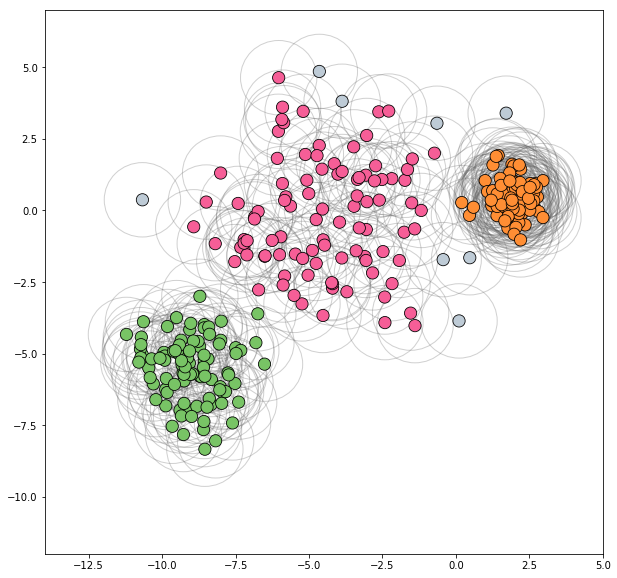

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)


## 以下施工中

In [273]:
#更新版
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    
    neighbor = _region_query(m, point_id, eps)  # neighbor points
    num_neighbor = neighbor.size  # number of neighbors

    if num_neighbor >= min_points : # the point is a core
        def_core = True
        classi = np.array(classifications)
        check = np.append(classi[neighbor], classi[point_id])
      
       # haven't been assigned to any cluster
        if sum(check) == 0 : 
            print('if')
            cluster_id = point_id
            
        # have been assigned to a cluster
        else :  
            print('else')
            for i in range(len(check)) :
                if type(check[i]) == np.int32 and check[i] != 0 :
                    print('else-if', check[i])
                    cluster_id = check[i]
                    break
        
        # assigning cluster_id to all points
        for j in neighbor :
            classifications[j] = cluster_id
        print('assign')
        classifications[point_id] = cluster_id
          
    
    elif num_neighbor < min_points : # the point is not a core
        def_core = False
        if classifications[point_id] == False : # new point
            classifications[point_id] = 0 

    else :
        def_core = "error"
        
        
    return def_core


#### 自我測試debug區

In [276]:
# test of test
dataset_1 = pd.read_csv('blobs.csv')[:39].values
t = np.asmatrix(dataset_1)
t = t.transpose()

In [277]:
m = t
eps = 1.6
min_points = 5
n_points = m.shape[1]

point_id = 0

cluster_id = 1
classifications = [UNCLASSIFIED] * n_points


for point_id in range(n_points) :
    a = _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points)
    print(point_id)
    print(classifications)
    if a == True :
        cluster_id += 1
check

0
[0, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
1
[0, 0, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
if
assign
2
[2, 0, 2, False, False, False, False, False, False, 2, False, False, 2, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 2, False, False, False, False, False]
if
assign
3
[2, 0, 2, 3, False, False, 3, False, False, 2, False, False, 2, 3, False, False, False, False, False, False, False, False, False, False, 3, False, False, False, False, False, False, Fals

array([0, 0, 0, 0, 6, 6])

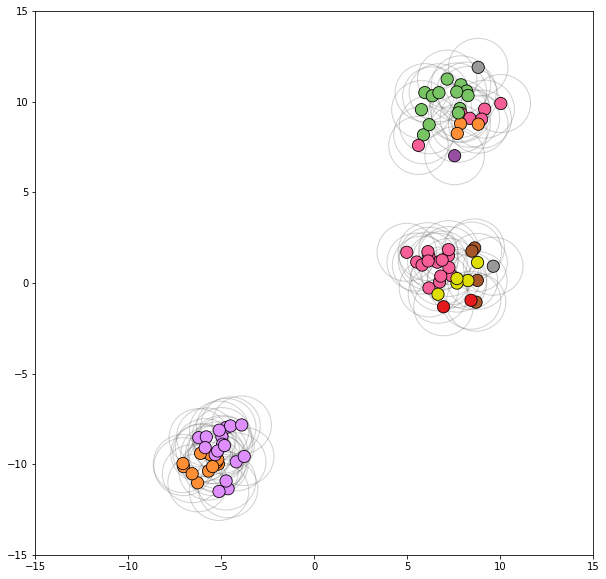

In [226]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [210]:
#更新版
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    
    for point_id in range(n_points) : 
        def_core = _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points)
        if def_core == True :
            cluster_id += 1
        

        
    return classifications

### 測試區

In [224]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [225]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

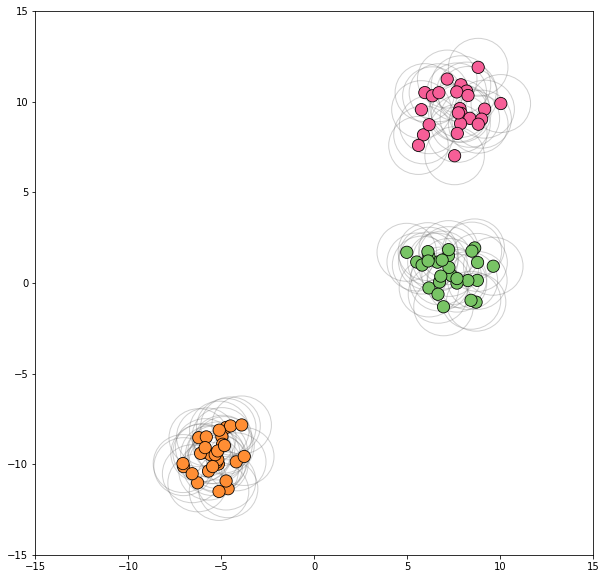

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [87]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [88]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

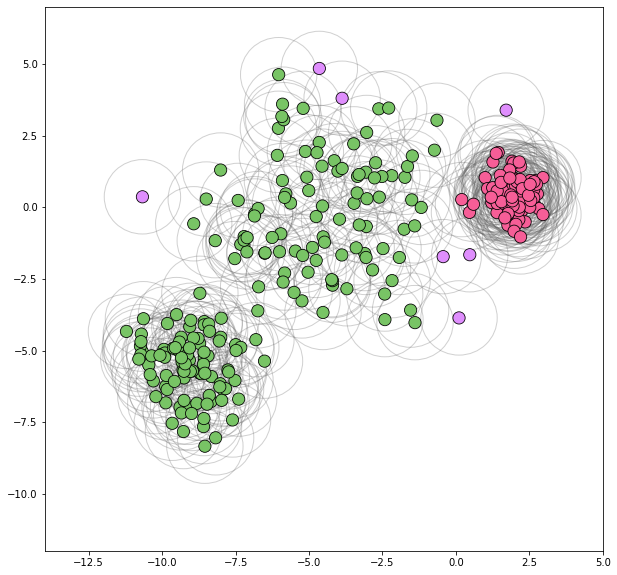

In [89]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)